#### Создание лингвистических переменных

Входные X: task и target
Выходные Y: need

In [28]:
import numpy as np
from skfuzzy import control as ctrl

task  = ctrl.Antecedent(np.arange(0, 100, 1), "task")
target = ctrl.Antecedent(np.arange(0, 100, 1), "target")
need = ctrl.Consequent(np.arange(0, 130, 1), "need")

#### Формирование нечетких переменных для лингвистических переменных и их визуализация

c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


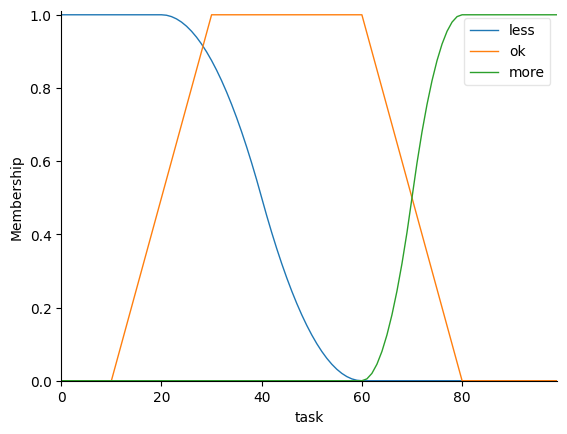

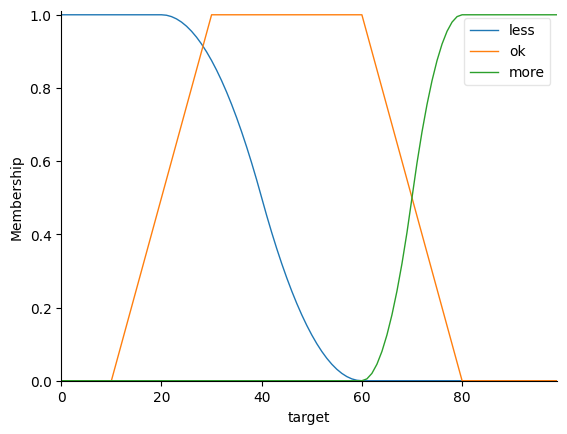

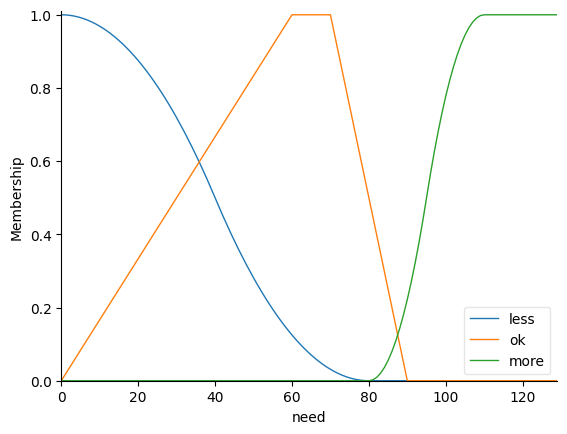

In [29]:
import skfuzzy as fuzz

task["less"] = fuzz.zmf(task.universe, 20, 60)
task["ok"] = fuzz.trapmf(task.universe, [10, 30, 60, 80])
task["more"] = fuzz.smf(task.universe, 60, 80)
task.view()

target["less"] = fuzz.zmf(target.universe, 20, 60)
target["ok"] = fuzz.trapmf(target.universe, [10, 30, 60, 80])
target["more"] = fuzz.smf(target.universe, 60, 80)
target.view()

need["less"] = fuzz.zmf(need.universe, 0, 80)
need["ok"] = fuzz.trapmf(need.universe, [0, 60, 70, 90])
need["more"] = fuzz.smf(need.universe, 80, 110)
need.view()

#### Формирование и визуализация базы нечетких правил

В случае ошибки необходимо в файле
```
.venv/lib/python3.13/site-packages/skfuzzy/control/visualization.py
```
удалить лишний отступ на 182 строке, должно быть:
```python
        if not matplotlib_present:
            raise ImportError("`ControlSystemVisualizer` can only be used "
                              "with `matplotlib` present in the system.")

        self.ctrl = control_system

        self.fig, self.ax = plt.subplots()
```

(<Figure size 640x480 with 1 Axes>, <Axes: >)

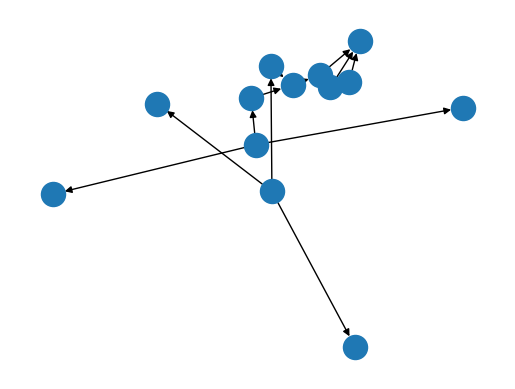

In [30]:
rule1 = ctrl.Rule(task["less"] & target["more"], need["more"])
rule2 = ctrl.Rule(task["less"] & target["ok"], need["more"])
rule3 = ctrl.Rule(task["less"] & target["less"], need["less"])
rule4 = ctrl.Rule(task["ok"] & target["more"], need["more"])
rule5 = ctrl.Rule(task["ok"] & target["ok"], need["ok"])
rule6 = ctrl.Rule(task["ok"] & target["less"], need["less"])
rule7 = ctrl.Rule(task["more"] & target["more"], need["more"])
rule8 = ctrl.Rule(task["more"] & target["ok"], need["less"])
rule9 = ctrl.Rule(task["more"] & target["less"], need["less"])

rule1.view()

#### Создание нечеткой системы и добавление нечетких правил в базу знаний нечеткой системы

In [31]:
need_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

needs = ctrl.ControlSystemSimulation(need_ctrl)

#### Пример расчета выходной переменной influx на основе входных переменных level и flow

Система также формирует подробный журнал выполнения процесса нечеткого логического вывода

In [32]:
needs.input["task"] = 60
needs.input["target"] = 20
needs.compute()
needs.print_state()
needs.output["need"]

 Antecedents 
Antecedent: task                    = 60
  - less                            : 0.0
  - ok                              : 1.0
  - more                            : 0.0
Antecedent: target                  = 20
  - less                            : 1.0
  - ok                              : 0.5
  - more                            : 0.0

 Rules 
RULE #0:
  IF task[less] AND target[more] THEN need[more]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - task[less]                                             : 0.0
  - target[more]                                           : 0.0
                               task[less] AND target[more] = 0.0
  Activation (THEN-clause):
                                                need[more] : 0.0

RULE #1:
  IF task[less] AND target[ok] THEN need[more]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - task[less]                                      

np.float64(35.97074517705886)

#### Визуализация функции принадлежности для выходной переменной influx

Функция получена в процессе аккумуляции и используется для дефаззификации значения выходной переменной influx

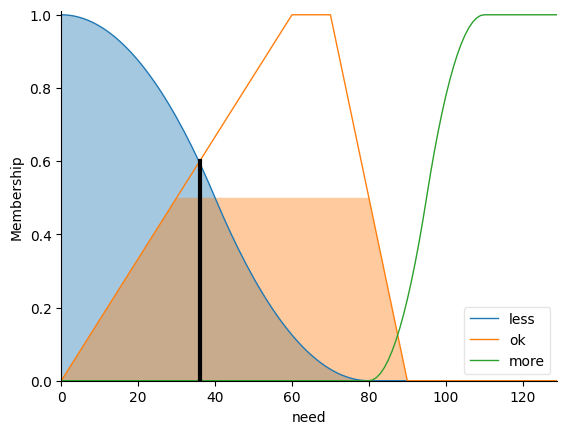

In [33]:
need.view(sim=needs)

## Пример решения задачи регрессии на основе нечеткого логического вывода

#### Загрузка данных

In [ ]:
import pandas as pd
from utils import split_stratified_into_train_val_test
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Загрузка и обработка данных
df = pd.read_csv("data/kc_house_data.csv")
df = df.drop(["id", "date", "lat", "long"], axis=1)
df = df.dropna()

# Разбиение на обучающую, валидационную и тестовую выборки
houses_train, X_val, houses_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df,
    stratify_colname="zipcode",  # Стратификация по району
    target_colname="price",
    frac_train=0.80,
    frac_val=0,
    frac_test=0.20
)

# Удаляем столбец стратификации
houses_train = houses_train.drop("zipcode", axis=1)
houses_test = houses_test.drop("zipcode", axis=1)

display("houses_train", houses_train)
display("houses_test", houses_test)

'houses_train'

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
9848   450000.0         2       2.00         1610      6160     2.0   
3710   361000.0         3       1.50         1200      7236     1.0   
16998  413000.0         4       1.00         1410      6000     1.0   
1968   490000.0         4       2.25         2020     85813     2.0   
16407  333000.0         3       1.00         1050      7560     1.0   
...         ...       ...        ...          ...       ...     ...   
12454  229000.0         2       1.00          810      5100     1.0   
10242  279000.0         3       1.00         1520      8055     1.5   
17115  182500.0         3       1.00          910      7194     1.0   
19205  695000.0         3       3.25         3080     12100     2.0   
12428  430000.0         3       1.00         1210      5200     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
9848            0     0          4      8        1610              0   
3710            0     0          3      7        1200              0   
16998           0     0          3      7         810            600   
1968            0     0          3      7        2020              0   
16407           0     0          3      7        1050              0   
...           ...   ...        ...    ...         ...            ...   
12454           0     0          3      6         810              0   
10242           0     0          3      7        1520              0   
17115           0     0          4      7         910              0   
19205           0     0          3      8        2080           1000   
12428           0     0          3      6        1210              0   

       yr_built  yr_renovated  sqft_living15  sqft_lot15  
9848       1977             0           1750        6305  
3710       1975             0           1680        7800  
16998      1925             0           1500        4800  
1968       1995             0           2120       85813  
16407      1951             0           1490        7560  
...         ...           ...            ...         ...  
12454      1955             0           1500        5100  
10242      1952             0           1560        8160  
17115      1971             0           1530        7200  
19205      1984             0           2100        6581  
12428      1941             0            890        5200  

[17290 rows x 16 columns]

'houses_test'

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8943    852600.0         4       2.50         3320     11901     2.0   
16711   795000.0         3       2.75         1820      7517     1.0   
4156    222000.0         3       1.75         1240      7560     1.0   
20873   375000.0         6       2.25         3206      5793     2.0   
6498    274950.0         3       2.25         1570      8767     1.0   
...          ...       ...        ...          ...       ...     ...   
21109   315000.0         2       2.25         1240       705     2.0   
13160   240000.0         2       1.00         1320     24319     1.0   
3892    695500.0         5       2.75         2510      9180     1.0   
15547   910000.0         3       2.00         2700      6120     1.0   
11770  1850000.0         5       3.25         3680      6060     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
8943            0     0          5      9        2650            670   
16711           0     0          3      9        1820              0   
4156            0     0          3      8        1070            170   
20873           0     0          3      7        3206              0   
6498            0     0          3      7        1180            390   
...           ...   ...        ...    ...         ...            ...   
21109           0     0          3      7        1150             90   
13160           0     0          3      7        1320              0   
3892            0     1          4      8        1600            910   
15547           0     0          4      8        1350           1350   
11770           0     0          5      9        2630           1050   

       yr_built  yr_renovated  sqft_living15  sqft_lot15  
8943       1977             0           2700       11114  
16711      1997             0           2540        8035  
4156       1967             0           1650        7560  
20873      2012             0           2527        5804  
6498       1990             0           1570        7434  
...         ...           ...            ...         ...  
21109      2009             0           1240         750  
13160      1966             0           1430       98445  
3892       1975             0           2650        9780  
15547      1962             0           1700        4590  
11770      1925             0           3050        5850  

[4323 rows x 16 columns]

#### Инициализация лингвистических переменных и автоматическое формирование нечетких переменных

7700000.0


c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


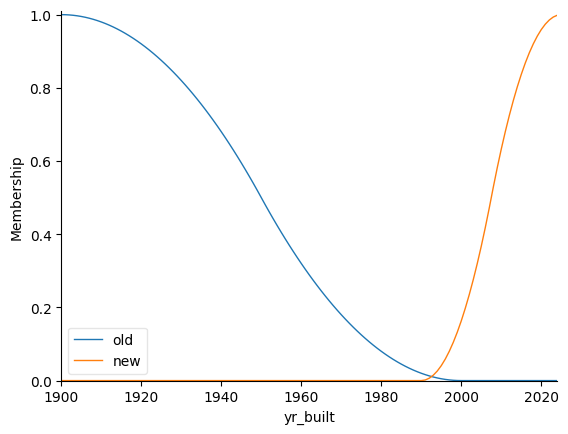

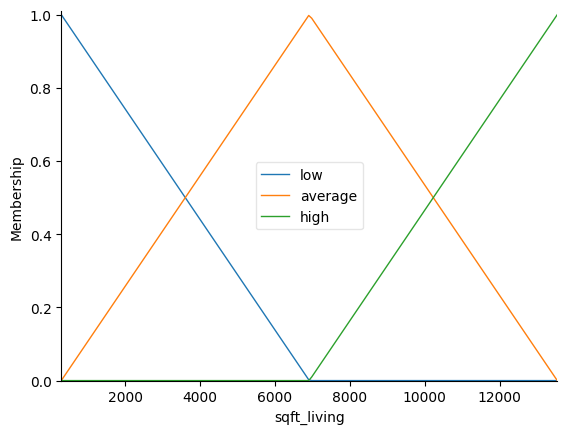

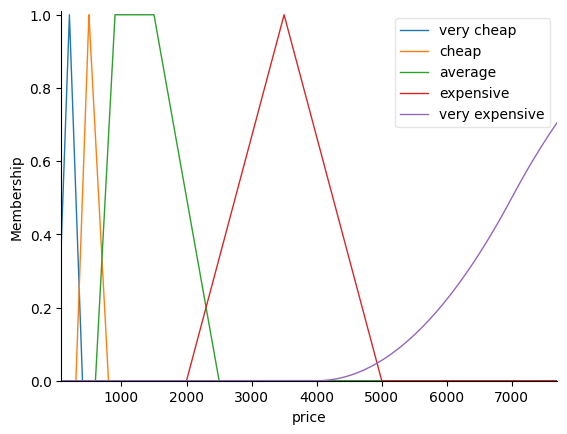

In [35]:
# Определение нечетких переменных
yr_built = ctrl.Antecedent(np.arange(1900, 2025, 1), "yr_built")
sqft_living = ctrl.Antecedent(houses_train["sqft_living"].sort_values().unique(), "sqft_living")

print(houses_train["price"].max())
price = ctrl.Consequent(np.arange(houses_train["price"].min() // 1000, 
                                  houses_train["price"].max() // 1000, 1), "price")

# Размытие переменных
yr_built["old"] = fuzz.zmf(yr_built.universe, 1900, 2000)
yr_built["new"] = fuzz.smf(yr_built.universe, 1990, 2025)
yr_built.view()

sqft_living.automf(3, variable_type="quant")
sqft_living.view()

price["very cheap"] = fuzz.trimf(price.universe, [0, 200, 400])
price["cheap"] = fuzz.trimf(price.universe, [300, 500, 800])
price["average"] = fuzz.trapmf(price.universe, [600, 900, 1500, 2500])
price["expensive"] = fuzz.trimf(price.universe, [2000, 3500, 5000])
price["very expensive"] = fuzz.smf(price.universe, 4000, 10000)
price.view()

#### Нечеткие правила

In [36]:
# Создание правил
rule11 = ctrl.Rule(
    sqft_living["low"] & yr_built["old"],
    price["very cheap"],
)
rule12 = ctrl.Rule(
    sqft_living["average"] & yr_built["old"],
    price["cheap"],
)
rule13 = ctrl.Rule(
    sqft_living["high"] & yr_built["old"],
    price["average"],
)
rule21 = ctrl.Rule(
    sqft_living["low"] & yr_built["new"],
    price["average"],
)
rule22 = ctrl.Rule(
    sqft_living["average"] & yr_built["new"],
    price["expensive"],
)
rule23 = ctrl.Rule(
    sqft_living["high"] & yr_built["new"],
    price["very expensive"],
)


#### Создание нечеткой системы

In [37]:
fuzzy_rules = [
    rule11,
    rule12,
    rule13,
    rule21,
    rule22, 
    rule23,
]

price_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(price_cntrl)

fuzzy_rules

[IF sqft_living[low] AND yr_built[old] THEN price[very cheap]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF sqft_living[average] AND yr_built[old] THEN price[cheap]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF sqft_living[high] AND yr_built[old] THEN price[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF sqft_living[low] AND yr_built[new] THEN price[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF sqft_living[average] AND yr_built[new] THEN price[expensive]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF sqft_living[high] AND yr_built[new] THEN price[very expensive]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax]

#### Пример использования полученной нечеткой системы

In [43]:
# Пример предсказания
sim.input["yr_built"] = 2016
sim.input["sqft_living"] = 1500
sim.compute()
sim.print_state()
display(sim.output["price"])

 Antecedents 
Antecedent: sqft_living             = 1500
  - low                             : 0.8173584905660377
  - average                         : 0.18264150943396226
  - high                            : 0.0
Antecedent: yr_built                = 2016
  - old                             : 0.0
  - new                             : 0.8677551020408163

 Rules 
RULE #0:
  IF sqft_living[low] AND yr_built[old] THEN price[very cheap]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - sqft_living[low]                                       : 0.8173584905660377
  - yr_built[old]                                          : 0.0
                        sqft_living[low] AND yr_built[old] = 0.0
  Activation (THEN-clause):
                                         price[very cheap] : 0.0

RULE #1:
  IF sqft_living[average] AND yr_built[old] THEN price[cheap]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):


np.float64(2057.986185801524)

#### Функция для автоматизации вычисления целевой переменной Y на основе вектора признаков X

In [39]:
# Функция предсказания
def fuzzy_pred(row):
    sim.input["yr_built"] = row["yr_built"]
    sim.input["sqft_living"] = row["sqft_living"]
    sim.compute()
    return sim.output["price"]

#### Тестирование нечеткой системы на обучающей выборке

In [40]:
# Применение к обучающим данным
result_train = houses_train.copy()
result_train["PricePred"] = result_train.apply(fuzzy_pred, axis=1)

result_train.head(15)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
9848    450000.0         2       2.00         1610      6160     2.0   
3710    361000.0         3       1.50         1200      7236     1.0   
16998   413000.0         4       1.00         1410      6000     1.0   
1968    490000.0         4       2.25         2020     85813     2.0   
16407   333000.0         3       1.00         1050      7560     1.0   
17067   219950.0         3       1.50         1210      5200     1.0   
2304    290000.0         2       1.00         1340      9840     1.0   
16319   500000.0         2       1.00         1440      7130     1.0   
13758  1712500.0         3       3.25         2940      5432     3.0   
408     364950.0         4       2.50         1930      6957     2.0   
19017  3800000.0         3       4.25         5510     35000     2.0   
5736    600000.0         3       2.50         2320     52272     1.5   
2362    278000.0         3       1.00          860      7632     1.0   
17316   578550.0         3       2.50         2120      6602     2.0   
1713    300000.0         3       1.75         1280     12776     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
9848            0     0          4      8        1610              0   
3710            0     0          3      7        1200              0   
16998           0     0          3      7         810            600   
1968            0     0          3      7        2020              0   
16407           0     0          3      7        1050              0   
17067           0     0          5      6        1210              0   
2304            0     0          3      7        1340              0   
16319           0     2          3      7        1210            230   
13758           0     3          4     10        2440            500   
408             0     0          3      8        1930              0   
19017           0     4          3     13        4910            600   
5736            0     0          3      8        2320              0   
2362            0     0          3      6         860              0   
17316           0     0          4      8        2120              0   
1713            0     0          4      7        1280              0   

       yr_built  yr_renovated  sqft_living15  sqft_lot15    PricePred  
9848       1977             0           1750        6305   429.624194  
3710       1975             0           1680        7800   428.207965  
16998      1925             0           1500        4800   310.375162  
1968       1995             0           2120       85813  2752.148335  
16407      1951             0           1490        7560   310.403184  
17067      1969             0           1120        5200   398.865957  
2304       1949             0           1610        8949   327.464832  
16319      1948             0           1970        7130   331.587824  
13758      1978             0           4400        5500   430.289457  
408        1995             0           2090        6996  2752.148335  
19017      1997             0           3430       45302  2769.489768  
5736       1974             0           2200       52272   427.457268  
2362       1920             0            890        7632   270.308711  
17316      1989             0           2330        7795   435.688044  
1713       1977             0           1680       11704   429.624194

#### Тестирование нечеткой системы на тестовой выборке

In [41]:
result_test = houses_test.copy()
result_test["PricePred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["PricePred"] = result_test["PricePred"].apply(lambda x: x)

display(result_test)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8943    852600.0         4       2.50         3320     11901     2.0   
16711   795000.0         3       2.75         1820      7517     1.0   
4156    222000.0         3       1.75         1240      7560     1.0   
20873   375000.0         6       2.25         3206      5793     2.0   
6498    274950.0         3       2.25         1570      8767     1.0   
...          ...       ...        ...          ...       ...     ...   
21109   315000.0         2       2.25         1240       705     2.0   
13160   240000.0         2       1.00         1320     24319     1.0   
3892    695500.0         5       2.75         2510      9180     1.0   
15547   910000.0         3       2.00         2700      6120     1.0   
11770  1850000.0         5       3.25         3680      6060     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
8943            0     0          5      9        2650            670   
16711           0     0          3      9        1820              0   
4156            0     0          3      8        1070            170   
20873           0     0          3      7        3206              0   
6498            0     0          3      7        1180            390   
...           ...   ...        ...    ...         ...            ...   
21109           0     0          3      7        1150             90   
13160           0     0          3      7        1320              0   
3892            0     1          4      8        1600            910   
15547           0     0          4      8        1350           1350   
11770           0     0          5      9        2630           1050   

       yr_built  yr_renovated  sqft_living15  sqft_lot15    PricePred  
8943       1977             0           2700       11114   429.624194  
16711      1997             0           2540        8035  2769.489768  
4156       1967             0           1650        7560   390.429374  
20873      2012             0           2527        5804  2579.862557  
6498       1990             0           1570        7434   436.002078  
...         ...           ...            ...         ...          ...  
21109      2009             0           1240         750  2085.193978  
13160      1966             0           1430       98445   391.519006  
3892       1975             0           2650        9780   428.207965  
15547      1962             0           1700        4590   416.400374  
11770      1925             0           3050        5850   407.777504  

[4323 rows x 17 columns]

#### Оценка результатов на основе метрик для задачи регрессии

In [42]:
import math
from sklearn import metrics


rmetrics = {}

rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_test["price"], result_test["PricePred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["price"], result_test["PricePred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["price"], result_test["PricePred"])
)
rmetrics["R2_test"] = metrics.r2_score(
    result_test["price"], result_test["PricePred"]
)

rmetrics

{'RMSE_train': 649737.8258173236,
 'RMSE_test': 649737.8258173236,
 'RMAE_test': 736.5342738871541,
 'R2_test': -2.298493549806802}